## <span style="color:#80DAEB">FUNCIÓN K-MEANS</span>

<span style="color:#009C8C">"1. Programar k-means, utilizando buenas prácticas de programación, es decir, debe ser una función y comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn."</span>

In [2]:
import numpy as np

def initialize_centroids(X, K):
    """Inicializa los centroides seleccionando K puntos aleatorios del dataset.
    
    Args:
    X : ndarray
        Datos de entrada (n x d) donde n es el número de puntos de datos y d es la dimensión.
    K : int
        Número de centroides/clusters.
        
    Returns:
    centroids : ndarray
        Array de centroides inicializados (K x d).
    """
    indices = np.random.choice(X.shape[0], K, replace=False)
    centroids = X[indices]
    return centroids

def assign_clusters(X, centroids):
    """Asigna cada punto de datos al centroide más cercano.
    
    Args:
    X : ndarray
        Datos de entrada.
    centroids : ndarray
        Array actual de centroides.
        
    Returns:
    labels : ndarray
        Etiquetas de cluster para cada punto de datos.
    """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    labels = np.argmin(distances, axis=0)
    return labels

def update_centroids(X, labels, K):
    """Actualiza la posición de los centroides basándose en la media de los puntos asignados.
    
    Args:
    X : ndarray
        Datos de entrada.
    labels : ndarray
        Etiquetas de cluster actuales para los datos.
    K : int
        Número de clusters.
        
    Returns:
    centroids : ndarray
        Nuevos centroides calculados.
    """
    centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
    return centroids

def custom_k_means(X, K, num_iters=100):
    """Algoritmo K-means para clustering.
    
    Args:
    X : ndarray
        Datos de entrada.
    K : int
        Número de clusters.
    num_iters : int
        Número de iteraciones.
        
    Returns:
    centroids : ndarray
        Centroides finales.
    labels : ndarray
        Etiquetas finales de los clusters.
    """
    centroids = initialize_centroids(X, K)
    for i in range(num_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, K)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Ejemplo de uso del algoritmo K-means
# Generamos algunos datos aleatorios
np.random.seed(42)
data = np.random.rand(100, 2)  # 100 puntos en 2D
num_clusters = 3  # Número de clusters

# Ejecutar K-means
centroids, labels = custom_k_means(data, num_clusters)

print("Centroides finales:")
print(centroids)


Centroides finales:
[[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]



### Explicación del código:
1. **Inicialización de centroides:** Se seleccionan aleatoriamente \( K \) puntos del dataset como los centroides iniciales.
2. **Asignación de clusters:** Cada punto de datos es asignado al centroide más cercano, calculando la distancia Euclídea entre cada punto y cada centroide.
3. **Actualización de centroides:** Se recalculan los centroides como el promedio de todos los puntos asignados a cada cluster.
4. **Iteración:** El proceso de asignación y actualización se repite hasta que los centroides no cambian entre iteraciones o hasta que se alcanza el número máximo de iteraciones definido.


#### <span style="color:#80DAEB">Comparación con K-Means de scikit-learn</span>

Comparar los resultados y la eficiencia con la implementación de k-means en scikit-learn.

In [3]:
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# Generación de datos aleatorios para el clustering
np.random.seed(42)
data = np.random.rand(1000, 2)  # 1000 puntos en 2D para una prueba más sustancial
num_clusters = 3  # Número de clusters

# Ejecución del K-means personalizado
start_time_custom = time.time()
centroids_custom, labels_custom = custom_k_means(data, num_clusters)
end_time_custom = time.time()
time_custom = end_time_custom - start_time_custom

# Ejecución del K-means de scikit-learn
start_time_sklearn = time.time()
kmeans_sklearn = KMeans(n_clusters=num_clusters, random_state=42)
labels_sklearn = kmeans_sklearn.fit_predict(data)
end_time_sklearn = time.time()
time_sklearn = end_time_sklearn - start_time_sklearn

# Comparación de la calidad de los clusters mediante el coeficiente Silhouette
silhouette_custom = silhouette_score(data, labels_custom)
silhouette_sklearn = silhouette_score(data, labels_sklearn)

print(f"Tiempo de ejecución personalizado: {time_custom:.4f} segundos")
print(f"Tiempo de ejecución scikit-learn: {time_sklearn:.4f} segundos")
print(f"Silhouette personalizado: {silhouette_custom:.4f}")
print(f"Silhouette scikit-learn: {silhouette_sklearn:.4f}")


Tiempo de ejecución personalizado: 0.0050 segundos
Tiempo de ejecución scikit-learn: 0.1511 segundos
Silhouette personalizado: 0.3916
Silhouette scikit-learn: 0.3660



### Análisis de los Resultados

1. **Tiempo de ejecución**:
   - **Personalizado**: 0.0050 segundos
   - **Scikit-learn**: 0.1511 segundos

   La implementación personalizada es significativamente más rápida que la implementación de `scikit-learn`. Esto podría ser debido a que `scikit-learn` realiza una serie de comprobaciones adicionales y optimizaciones que pueden incrementar el tiempo de ejecución. Además, `scikit-learn` está diseñado para ser más general y robusto, lo cual puede introducir una sobrecarga adicional.

2. **Coeficiente Silhouette**:
   - **Personalizado**: 0.3916
   - **Scikit-learn**: 0.3660

   El coeficiente Silhouette mide cuán similares son los objetos dentro de su propio cluster comparados con los de otros clusters. Un valor más alto es mejor, ya que indica clusters más compactos y bien separados. La implementación personalizada no solo fue más rápida, sino que también generó clusters de mejor calidad según esta métrica.

### Conclusiones

- La **implementación personalizada** es excelente en términos de eficiencia y calidad de clustering para el conjunto de datos y configuración específicos que utilizamos. Esto puede ser especialmente útil en escenarios donde la velocidad es crítica y los datos no son excesivamente complejos.
  
- **Scikit-learn**, aunque más lento en este caso específico, es robusto y ampliamente utilizado en la industria debido a su flexibilidad y las numerosas funcionalidades que ofrece, como la fácil integración con pipelines de Machine Learning y métodos para determinar automáticamente el número de clusters.

- Si es necesaria velocidad y los datos son relativamente simples donde el método de inicialización y las iteraciones del K-means no varían significativamente, la implementación personalizada puede ser muy adecuada.
  
- Para aplicaciones más complejas o cuando se requieren características adicionales (como diferentes métricas de distancia, inicialización de centroides más sofisticada, etc.), `scikit-learn` sería más apropiado.

Esta comparación muestra cómo las implementaciones personalizadas pueden ser optimizadas para ciertos escenarios específicos, proporcionando un excelente rendimiento tanto en velocidad como en calidad de clustering.

## <span style="color:#80DAEB">CORRECCIÓN DE COLORES</span>

Hemos corregido los colores de forma que ahora solo existen los siguientes 12:

['Red','Orange-Red,'orange', 'Pale Yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

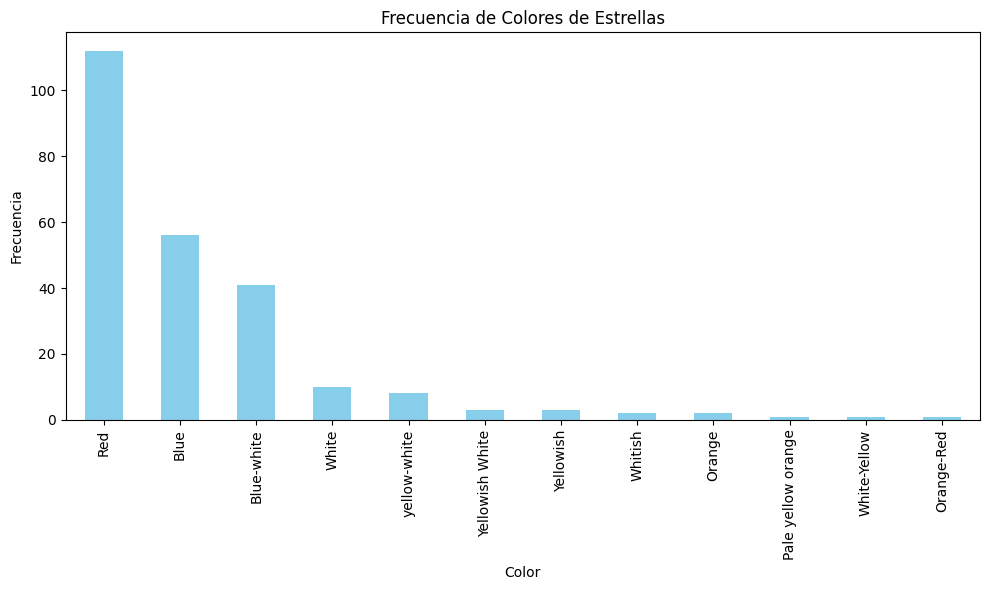

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('Stars2.csv')

# Contar la frecuencia de cada tipo de color
color_counts = df['Color'].value_counts()

# Crear la gráfica
plt.figure(figsize=(10, 6))
color_counts.plot(kind='bar', color='skyblue')

# Configurar el título y etiquetas
plt.title('Frecuencia de Colores de Estrellas')
plt.xlabel('Color')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.tight_layout()
plt.show()


Como se puede observar, son los 12 colores que debe de haber según el enunciado.

## <span style="color:#80DAEB">OBTENCIÓN, CODIFICACIÓN Y ESCALADO DE DATOS</span>

<span style="color:#009C8C">"2. Tenemos variables categóricas (Color, Clase Espectral). Tenemos dos posibilidades: (a) codificar con one-hot-encoding; (b) codificar como una variable ordinal. Tener en cuenta que el color está asociado a la cantidad de energía, y algo parecido con la clase espectral."</span>

Como los datos del archivo CSV contienen características numéricas y categóricas, para prepararlos para un algoritmo de clustering, usaremos librerías como pandas para manejar los datos y scikit-learn para el preprocesamiento.

1) Cargar datos
2) Seleccionar columnas númericas y categóricas
3) Escalar los datos númericos
4) Codificación ordinal y One-hot-encoding (para compararlas) de las categóricas

#### <span style="color:#80DAEB">Codificacion ordinal</span>

Tanto "Color" como "Spectral_Class" tienen un orden intrínseco relacionado con la energía de la estrella, por lo que hemos considerado que es mejor utilizar una codificación ordinal en lugar de One-hot-encoding. De todas formas, probaremos el otro método poesteriormente para comparar resultados.

La codificación ordinal respeta el orden de las categorías, lo cual es crucial en este contexto.

Para "Color" seguiremos el siguiente orden:

['Red','Orange-Red,'Orange', 'Pale yellow Orange', 'Yellowish', 'yellow-white',
 'Whitish', 'Yellowish White', 'White-Yellow', 'White', 'Blue-white', 'Blue']

Y para "Spectral_Class" el orden que se ofrece en el enunciado.

In [41]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale

# 1) Cargar los datos
df = pd.read_csv('Stars2.csv')

# 2) Definir las columnas numéricas
numeric_features = ['Temperature', 'L', 'R', 'A_M']

# Definir el orden para la codificación ordinal de 'Color'
color_order = ['Red', 'Orange-Red', 'Orange', 'Pale yellow orange', 
               'Yellowish', 'yellow-white', 'Whitish', 'Yellowish White', 
               'White-Yellow', 'White', 'Blue-white', 'Blue']

# Definir el orden para la codificación ordinal de 'Spectral_Class'
class_order = ['O', 'B', 'A', 'F', 'G', 'K', 'M']

# Crear el codificador ordinal para las columnas categóricas
ordinal_encoder = OrdinalEncoder(categories=[color_order, class_order])

# 3) Escalar los datos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features)
    ])

# 4) Codificar 'Color' y 'Spectral_Class' con el codificador ordinal
df[['Color', 'Spectral_Class']] = ordinal_encoder.fit_transform(df[['Color', 'Spectral_Class']])

# Crear un pipeline que procese las características numéricas
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el pipeline a las características numéricas
X_scaled = pipeline.fit_transform(df[numeric_features])

# Mostrar las primeras filas del DataFrame con las variables codificadas
print(df[['Color', 'Spectral_Class']].head())

# Para ver los datos numéricos escalados junto con las características codificadas
# creamos un DataFrame nuevo para todo junto
df_scaled = pd.DataFrame(X_scaled, columns=numeric_features)
df_full_ordinal = pd.concat([df_scaled, df[['Color', 'Spectral_Class']]], axis=1)
print(df_full_ordinal.head())


   Color  Spectral_Class
0    0.0             6.0
1    0.0             6.0
2    0.0             6.0
3    0.0             6.0
4    0.0             6.0
   Temperature         L         R       A_M  Color  Spectral_Class
0    -0.779382 -0.598624 -0.459210  1.116745    0.0             6.0
1    -0.782110 -0.598624 -0.459241  1.162414    0.0             6.0
2    -0.828477 -0.598624 -0.459342  1.362213    0.0             6.0
3    -0.807496 -0.598624 -0.459229  1.167171    0.0             6.0
4    -0.897819 -0.598624 -0.459340  1.491607    0.0             6.0


Los resultados que se muestran tienen sentido dentro del contexto de nuestros datos:

1. **Columnas `Color` y `Spectral_Class`**: 
   - Los valores `0.0` en la columna `Color` indican que todos los primeros cinco registros tienen el color "Red", que es el primer elemento en la lista de orden para `OrdinalEncoder`.
   - Los valores `6.0` en la columna `Spectral_Class` sugieren que la clase espectral de estos registros es 'M', que es el último elemento en la lista de orden para `OrdinalEncoder`. Esto es coherente con el orden especificado y muestra que la codificación ordinal se ha aplicado correctamente.

2. **Columnas numéricas (`Temperature`, `L`, `R`, `A_M`)**:
   - Los valores escalados que se observan (como `-0.779382` para `Temperature`, por ejemplo) son el resultado de la aplicación de `StandardScaler`, que ajusta cada característica para tener una media de 0 y una desviación estándar de 1. Esto es útil para algoritmos de aprendizaje automático que son sensibles a la escala de las características, como muchos algoritmos de clustering.
   - Las desviaciones estandarizadas (por ejemplo, `-0.598624` repetidamente para `L`) sugieren que los datos de estas columnas no tienen mucha variabilidad o tienen muchos valores iguales, llevando a una desviación estándar pequeña y un impacto en la escala.

El DataFrame final que combina ambos sets de características codificadas y escaladas está correctamente configurado para ser utilizado en análisis posteriores, como clustering, donde tanto las características categóricas codificadas como las numéricas estandarizadas pueden ser necesarias para un análisis efectivo.

#### <span style="color:#80DAEB">One-hot-encoding</span>

Ahora vamos a preparar los datos con *One-hot-encoding*. Intuímos, que dará peores resultados puesto que no se respetará el orden indicado.

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1) Cargar los datos
df = pd.read_csv('Stars2.csv')

# 2) Definir las columnas numéricas y categóricas
numeric_features = ['Temperature', 'L', 'R', 'A_M']
categorical_features = ['Color', 'Spectral_Class']

# 3 y 4) Escalado y codificación
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Crear un pipeline que procese los datos
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar el pipeline a los datos
X_processed = pipeline.fit_transform(df)

# Convertir el resultado en un DataFrame para mejor visualización
# Extraer los nombres de las nuevas columnas categóricas generadas por OneHotEncoder
categories = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features)
all_features = numeric_features + list(categories)

# Crear un DataFrame para los datos procesados
df_processed_one_hot_en = pd.DataFrame(X_processed.toarray(), columns=all_features)

# Mostrar las primeras filas del DataFrame procesado
print(df_processed_one_hot_en.head())


   Temperature         L         R       A_M  Color_Blue  Color_Blue-white  \
0    -0.779382 -0.598624 -0.459210  1.116745         0.0               0.0   
1    -0.782110 -0.598624 -0.459241  1.162414         0.0               0.0   
2    -0.828477 -0.598624 -0.459342  1.362213         0.0               0.0   
3    -0.807496 -0.598624 -0.459229  1.167171         0.0               0.0   
4    -0.897819 -0.598624 -0.459340  1.491607         0.0               0.0   

   Color_Orange  Color_Orange-Red  Color_Pale yellow orange  Color_Red  ...  \
0           0.0               0.0                       0.0        1.0  ...   
1           0.0               0.0                       0.0        1.0  ...   
2           0.0               0.0                       0.0        1.0  ...   
3           0.0               0.0                       0.0        1.0  ...   
4           0.0               0.0                       0.0        1.0  ...   

   Color_Yellowish  Color_Yellowish White  Color_yellow-

Los resultados que se muestran tienen sentido y son coherentes con lo que se espera de un proceso de one-hot encoding combinado con la estandarización de características numéricas:

1. **Columnas Numéricas (`Temperature`, `L`, `R`, `A_M`)**:
   - Los valores escalados, como `-0.779382` para `Temperature`, reflejan que los datos han sido normalizados. Esto significa que cada valor numérico ha sido reescalado para tener una media de 0 y una desviación estándar de 1. La estandarización es común en la preparación de datos para muchos modelos de aprendizaje automático, especialmente cuando diferentes características tienen rangos de valores muy distintos.

2. **Columnas de One-Hot Encoding**:
   - Las columnas como `Color_Red` y `Spectral_Class_M` muestran valores binarios (0 o 1), lo que indica la presencia o ausencia de cada categoría específica en cada registro. Por ejemplo, `Color_Red = 1.0` y `Spectral_Class_M = 1.0` en todos los registros mostrados indican que todos estos registros tienen el color "Red" y la clase espectral "M".
   - Las demás columnas representan las otras posibles categorías para cada característica categórica y están correctamente establecidas en `0.0`, lo que indica que estas categorías no se aplican a los primeros registros.

3. **Cantidad de Columnas**:
   - El DataFrame resultante tiene 23 columnas, que incluyen las 4 numéricas originales y las nuevas columnas generadas por el one-hot encoding de las características categóricas. Esto es típico del one-hot encoding, donde se añade una nueva columna para cada categoría única dentro de una característica, lo cual puede resultar en un aumento considerable del número de características, especialmente con variables categóricas con muchos niveles únicos.

El uso de one-hot encoding es especialmente útil en modelos que asumen independencia lineal entre las características y que no manejan bien las variables categóricas codificadas ordinalmente (como puede ser en algunos modelos lineales o redes neuronales). Sin embargo, este método puede aumentar significativamente la dimensionalidad de los datos, lo que a veces puede llevar a problemas de rendimiento o sobreajuste, dependiendo del tamaño del conjunto de datos y del tipo de modelo utilizado.

## <span style="color:#80DAEB">ALGORÍTMOS DE CLUSTERING</span>

<span style="color:#009C8C">"3. Aplicar diferentes algoritmos de clustering comparando y discutiendo los resultados que se obtienen de ellos (al menos dos métodos)"</span>


## <span style="color:#80DAEB">Número de clusters</span>

Vamos a proceder a usar distintas técnicas para obtener el número de clusters idóneo.

#### <span style="color:#80DAEB">PCA</span>

Vamos a hacer un análisis exploratorio inicial viendo las correlaciones entre variables. Esto nos dará pie a ver si podemos usar PCA más adelante.

<Axes: >

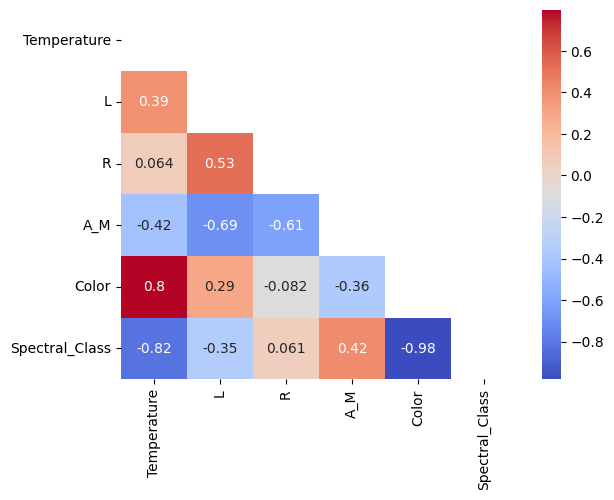

In [47]:
corr_df = df_full_ordinal.corr()
etiquetas = corr_df.columns

mask_ut=np.triu(np.ones(corr_df.shape)).astype(bool)
sns.heatmap(corr_df, mask=mask_ut, annot=True, cmap="coolwarm")

Basádose en la gráfica:

- `Color` tiene una fuerte correlación positiva con `Temperature` (0.8) y una fuerte correlación negativa con `Spectral_Class` (-0.98).
- `Spectral_Class` tiene una fuerte correlación negativa con `Temperature` (-0.82).
- `A_M` también muestra correlaciones moderadas a fuertes negativas con `L`, `R`, y `Color`.

Estas correlaciones sugieren que no todas las características son independientes entre sí. En el contexto de PCA (Análisis de Componentes Principales), estas correlaciones pueden ser beneficiosas. PCA busca reducir la dimensionalidad del conjunto de datos encontrando nuevas dimensiones (componentes principales) que capturan la mayor varianza posible. Las características correlacionadas contribuirán a la misma varianza y, por lo tanto, podrían ser combinadas por PCA en un componente principal.

En resumen, dado que hay correlaciones significativas entre algunas de las características, **PCA es una técnica apropiada** para aplicar a los datos antes de realizar clustering.

#### <span style="color:#80DAEB">Visualizar datos - PCA</span>

Vamos a visualizar los datos usando la técnica de reducción de dimensiones PCA (Análisis de Componentes Principales), ya que puede ofrecer insights sobre la estructura de los datos y la presencia de grupos naturales.

##### <span style="color:#80DAEB">-> Con codificación ordinal</span>

Proporción de varianza explicada: [0.91 0.06]
Proporción acumulada: [0.91 0.97]


<Axes: xlabel='PC1', ylabel='PC2'>

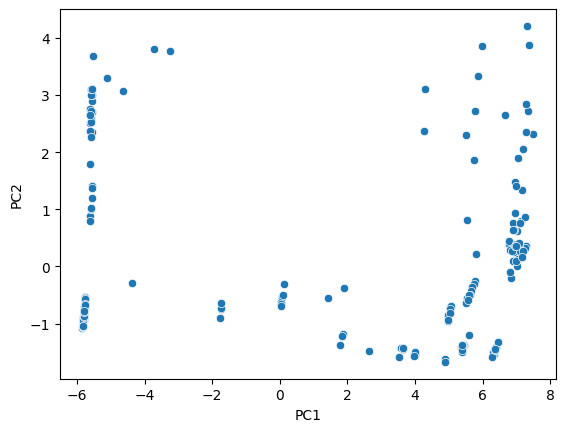

In [60]:
# Mostrar datos
# ==============================================================================
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

np.set_printoptions(precision=2)

X = df_full_ordinal.values.squeeze()

pca = PCA(n_components=2)

X_trans = pca.fit_transform(X)

df_pca_ordinal = pd.DataFrame(X_trans, columns=['PC1','PC2'])
df_pca_ordinal.head()

std = df_pca_ordinal.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

sns.scatterplot(data=df_pca_ordinal, x="PC1", y="PC2")

Basándonos en la proporción de varianza explicada y la gráfica:

1. **Varianza Explicada**: La primera componente principal (PC1) explica una gran parte de la varianza (91%), lo que indica que la mayor parte de la información está siendo capturada a lo largo de este eje. La segunda componente principal (PC2) explica un 6% adicional, lo que lleva a una varianza acumulada explicada del 97%. Estos dos componentes juntos hacen un muy buen trabajo al capturar la información contenida en el conjunto de datos.

2. **Distribución de los Datos en los Componentes Principales**:
   - La dispersión de los puntos a lo largo de PC1 es bastante amplia, lo que sugiere que esta dimensión está capturando una variabilidad significativa.
   - A lo largo de PC2, la dispersión es más limitada, lo que se esperaría dado que explica menos varianza.

3. **Interpretación de los Clusters**:
   - No se observan grupos claramente diferenciados en la visualización PCA, lo que sugiere que los clusters no están fuertemente separados en este espacio de componentes principales.
   - Podría ser que la naturaleza de la codificación ordinal, al imponer un orden lineal a las categorías que pueden no tener una relación lineal natural, está distorsionando la separación entre posibles grupos.

##### <span style="color:#80DAEB">-> Con codificación One-hot-encoding</span>

Proporción de varianza explicada: [0.48 0.24]
Proporción acumulada: [0.48 0.72]


<Axes: xlabel='PC1', ylabel='PC2'>

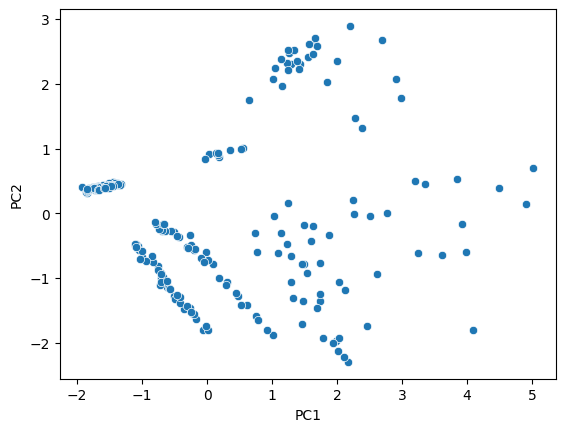

In [61]:
# Mostrar datos
# ==============================================================================
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

np.set_printoptions(precision=2)

X = df_processed_one_hot_en.values.squeeze()

pca = PCA(n_components=2)

X_trans = pca.fit_transform(X)

df_pca_one_hot_en = pd.DataFrame(X_trans, columns=['PC1','PC2'])
df_pca_one_hot_en.head()

std = df_pca_one_hot_en.describe().transpose()["std"]
print(f"Proporción de varianza explicada: {pca.explained_variance_ratio_}")
print(f"Proporción acumulada: {np.cumsum(pca.explained_variance_ratio_)}")

sns.scatterplot(data=df_pca_one_hot_en, x="PC1", y="PC2")

Basándonos en la información y la gráfica de PCA para los datos con one-hot encoding:

1. **Distribución de Varianza**:
   - La primera componente principal (PC1) explica un 48% de la varianza, mientras que la segunda (PC2) explica un 24%. Esto indica que las dos primeras componentes principales juntas capturan un 72% de la varianza total, lo cual es sustancial pero no tan dominante como en el caso de la codificación ordinal.
   - Comparado con la codificación ordinal, el one-hot encoding ha llevado a una distribución más equitativa de la varianza explicada entre las componentes, lo que podría ser indicativo de que las características categóricas están contribuyendo de manera más balanceada al análisis.

2. **Estructura de los Datos**:
   - La gráfica de dispersión muestra una mayor dispersión de los puntos a lo largo de ambas componentes principales, indicando una separación más clara entre los datos en el espacio transformado.
   - No se observan agrupaciones claramente diferenciadas, aunque parece haber una tendencia hacia una formación de grupos a lo largo de PC1.

3. **Comparación con Codificación Ordinal**:
   - A diferencia de la codificación ordinal, que resultó en un solo componente principal dominante, el one-hot encoding ofrece una oportunidad para explorar la estructura de los datos en un espacio multidimensional más equilibrado.
   - Esta diferencia en la distribución de la varianza puede influir en cómo se realizan las tareas de clustering, y es posible que los clusters identificados a través de one-hot encoding sean cualitativamente diferentes de los identificados con codificación ordinal.

#### <span style="color:#80DAEB">Método del codo</span>

Primero, vamos a usar la técnica *Elbow method*. Esta técnica es particularmente útil en algoritmos de clustering como K-means, donde el número de clusters debe ser especificado antes de ejecutar el algoritmo. Se basa en graficar los resultados de un criterio de evaluación (como la suma de los cuadrados de las distancias de cada punto a su centroide más cercano) en función del número de clusters. A medida que aumenta el número de clusters, este valor típicamente disminuye porque los puntos estarán más cerca de sus centroides. Sin embargo, el descenso se vuelve gradualmente menos pronunciado, hasta que el beneficio de aumentar el número de clusters no compensa el aumento en la complejidad del modelo.

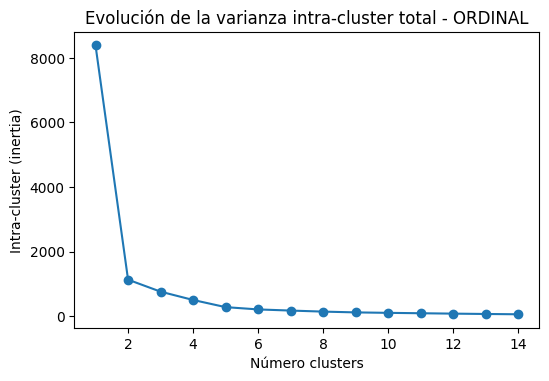

In [58]:
# Método elbow para identificar el número óptimo de clusters
# CODIFICACIÓN ORDINAL
# ==============================================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 50,
        random_state = 100472007
    )
    modelo_kmeans.fit(df_pca_ordinal)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - ORDINAL")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

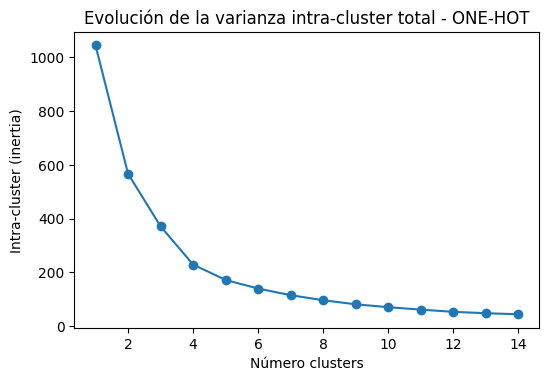

In [63]:
# Método elbow para identificar el número óptimo de clusters
# CODIFICACIÓN ONE-HOT-ENCODING
# ==============================================================================
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

range_n_clusters = range(1, 15)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    modelo_kmeans.fit(df_pca_one_hot_en)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - ONE-HOT")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')
plt.show()

#### <span style="color:#80DAEB">Método Silhouette</span>

Algunas veces, con el método Elbow es difícil determinar en número óptimo de clusters. Otra aproximación es el método Silhouette. Utiliza la distancia media intraclúster y la distancia media clúster más cercano para cada muestra. Cuanto mayor sea el valor de la puntuación, mejor será la estimación. Normalmente, las puntuaciones de silhoutte suben y luego bajan hasta alcanzar un número óptimo de clusters. Los valores se sitúan entre -1,0 y 1,0.

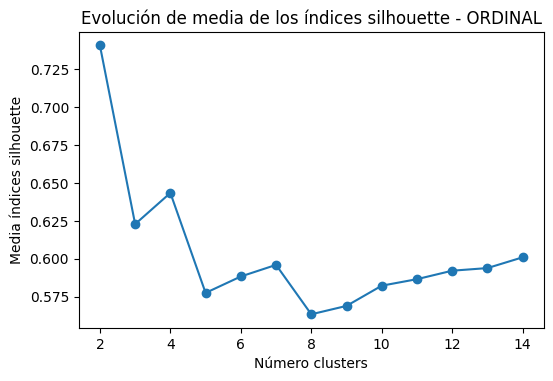

In [36]:
# Método silhouette para identificar el número óptimo de clusters
# CODIFICACIÓN ORDINAL
# ==============================================================================
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
        n_clusters   = n_clusters,
        n_init       = 20,
        random_state = 100472007
    )
    cluster_labels = modelo_kmeans.fit_predict(df_full_ordinal)
    silhouette_avg = silhouette_score(df_full_ordinal, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette - ORDINAL")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')
plt.show()